In [1]:
import scanpy as sc
import anndata as ad
import numpy as np
import pandas as pd

In [2]:
sc.settings.verbosity = 3   # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()

scanpy==1.4.4.post1 anndata==0.6.22.post1 umap==0.3.9 numpy==1.16.4 scipy==1.3.0 pandas==0.24.2 scikit-learn==0.21.2 statsmodels==0.10.0 python-igraph==0.7.1 louvain==0.6.1


# Load raw data matrix.
Data available on GEO: GSE116470
GRCm38.81.P60Cortex

In [ ]:
result_file = 'processed_matrix_GSE116470_F_GRCm38.81.P60Cortex.h5ad'

In [48]:
DATADIR = './data/'
input_raw = "raw_matrix_GSE116470_F_GRCm38.81.P60Cortex.h5ad"
adata = ad.read(DATADIR+input_raw)
adata

AnnData object with n_obs × n_vars = 194027 × 29463 

In [ ]:
# settings for the plots
sc.set_figure_params(scanpy=True, dpi=80, dpi_save=250,
                     frameon=True, vector_friendly=True,
                     color_map="YlGnBu", format='pdf', transparent=False,
                     ipython_format='png2x')

In [50]:
# save the matrix as sparse
from scipy.sparse import csc_matrix
adata.X = csc_matrix(adata.X)

In [51]:
adata.X

<194027x29463 sparse matrix of type '<class 'numpy.float32'>'
	with 222527947 stored elements in Compressed Sparse Column format>

### load metadata

In [55]:
with open(DATADIR+'annot_cell_outcomes_FC.csv') as f:
    annot = f.readlines()
annot = [l.split(',') for l in annot]
head = annot[0]
head[0] = 'cell_name'
annot = annot[1:]

annot2 = []
for line in annot:
    if line[-1] == 'NA\n':
        annot2.append([line[0][1:-1], line[1][1:-1], line[2][1:-1], line[-1][:-1]])
    else:
        annot2.append([line[0][1:-1], line[1][1:-1], line[2][1:-1], line[-1][1:-2]])
del annot
annot = annot2

with open(DATADIR+'annot_frontal_cortex.csv') as f:
    cell_types = f.readlines()
cell_types = [l[:-1].split(';') for l in cell_types]
head_cell_types = cell_types[0]
cell_types = cell_types[1:]

total_annot = []
for line in annot:
    for cell_line in cell_types:
        if line[-2] == cell_line[-2]:
            line += cell_line
            total_annot.append(line)

total_header = head + head_cell_types
### loading the annotations according to cell names
cell_names = adata.obs_names
dico_annot = {}
for key in total_header:
    dico_annot[key] = []
for cell in cell_names:
    found = False
    for line in total_annot:
        if cell == line[0]:
            found = True
            i = 0
            for key in total_header:
                dico_annot[key].append(line[i])
                i += 1
            break
    if found == False:
        for key in total_header:
            dico_annot[key].append('NA')
        
for key in total_header:
    adata.obs[key] = dico_annot[key]

In [56]:
adata.obs

,cell_name,"""cluster""","""subcluster""","""reason""",tissue,class,class_marker,type_marker,full_name,common_name,subcluster,tissue_subcluster
index,,,,,,,,,,,,
P60FCRep1P1_CAATCCGACAAC,P60FCRep1P1_CAATCCGACAAC,12,12-2,NA,FC,ENDOTHELIAL_STALK,Flt1,Mgp,Endothelial_Stalk.Flt1.Mgp,Endothelial_Stalk.Flt1.Mgp,12-2,FC_12-2
P60FCRep1P1_TCCCTTCAAGTA,P60FCRep1P1_TCCCTTCAAGTA,6,6-4,NA,FC,NEURON,Slc17a7,Nptxr-Deptor,Neuron.Slc17a7.Nptxr-Deptor,Deep layer pyramidal cells--Layer 5a,6-4,FC_6-4
P60FCRep1P1_CACTAAAGCCAG,P60FCRep1P1_CACTAAAGCCAG,6,6-4,NA,FC,NEURON,Slc17a7,Nptxr-Deptor,Neuron.Slc17a7.Nptxr-Deptor,Deep layer pyramidal cells--Layer 5a,6-4,FC_6-4
P60FCRep1P1_ATGGTCTCAAAC,P60FCRep1P1_ATGGTCTCAAAC,6,6-4,NA,FC,NEURON,Slc17a7,Nptxr-Deptor,Neuron.Slc17a7.Nptxr-Deptor,Deep layer pyramidal cells--Layer 5a,6-4,FC_6-4
P60FCRep1P1_CCTTCCATGCGA,P60FCRep1P1_CCTTCCATGCGA,6,6-1,NA,FC,NEURON,Slc17a7,Nptxr-Calb1,Neuron.Slc17a7.Nptxr-Calb1,Superficial layer pyramidal cells--Layer 2/3,6-1,FC_6-1
P60FCRep1P1_CCTCACACCCCC,P60FCRep1P1_CCTCACACCCCC,6,6-4,NA,FC,NEURON,Slc17a7,Nptxr-Deptor,Neuron.Slc17a7.Nptxr-Deptor,Deep layer pyramidal cells--Layer 5a,6-4,FC_6-4
P60FCRep1P1_CTTATCAGCAGG,P60FCRep1P1_CTTATCAGCAGG,6,6-3,NA,FC,NEURON,Slc17a7-Slc17a6,Nptxr-Rorb,Neuron.Slc17a7-Slc17a6.Nptxr-Rorb,Deep layer pyramidal cells--Layer 5a,6-3,FC_6-3
P60FCRep1P1_CTATCAGGCTGC,P60FCRep1P1_CTATCAGGCTGC,7,7-6,NA,FC,NEURON,Slc17a7,Parm1.Nefm,Neuron.Slc17a7.Parm1.Nefm,Deep layer pyramidal cells--layer 5,7-6,FC_7-6
P60FCRep1P1_GTCGCGGCACCT,P60FCRep1P1_GTCGCGGCACCT,6,6-4,NA,FC,NEURON,Slc17a7,Nptxr-Deptor,Neuron.Slc17a7.Nptxr-Deptor,Deep layer pyramidal cells--Layer 5a,6-4,FC_6-4


In [57]:
adata

AnnData object with n_obs × n_vars = 194027 × 29463 
    obs: 'cell_name', '"cluster"', '"subcluster"', '"reason"\n', 'tissue', 'class', 'class_marker', 'type_marker', 'full_name', 'common_name', 'subcluster', 'tissue_subcluster'

In [58]:
# save the matrix as a sparse matrix with annotations
adata.write(DATADIR+result_file)

... storing 'cell_name' as categorical
... storing '"cluster"' as categorical
... storing '"subcluster"' as categorical
... storing '"reason"\n' as categorical
... storing 'tissue' as categorical
... storing 'class' as categorical
... storing 'class_marker' as categorical
... storing 'type_marker' as categorical
... storing 'full_name' as categorical
... storing 'common_name' as categorical
... storing 'subcluster' as categorical
... storing 'tissue_subcluster' as categorical


# Quality controls etc.

In [59]:
DATADIR = './data/'
input_raw = "raw_matrix_GSE116470_F_GRCm38.81.P60Cortex.h5ad"
adata = ad.read(DATADIR+input_raw)
adata

AnnData object with n_obs × n_vars = 194027 × 29463 
    obs: 'cell_name', '"cluster"', '"subcluster"', '"reason"\n', 'tissue', 'class', 'class_marker', 'type_marker', 'full_name', 'common_name', 'subcluster', 'tissue_subcluster'

In [60]:
# settings for the plots
sc.set_figure_params(scanpy=True, dpi=80, dpi_save=250,
                     frameon=True, vector_friendly=True,
                     color_map="YlGnBu", format='pdf', transparent=False,
                     ipython_format='png2x')

normalizing by total count per cell
    finished (0:00:07): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


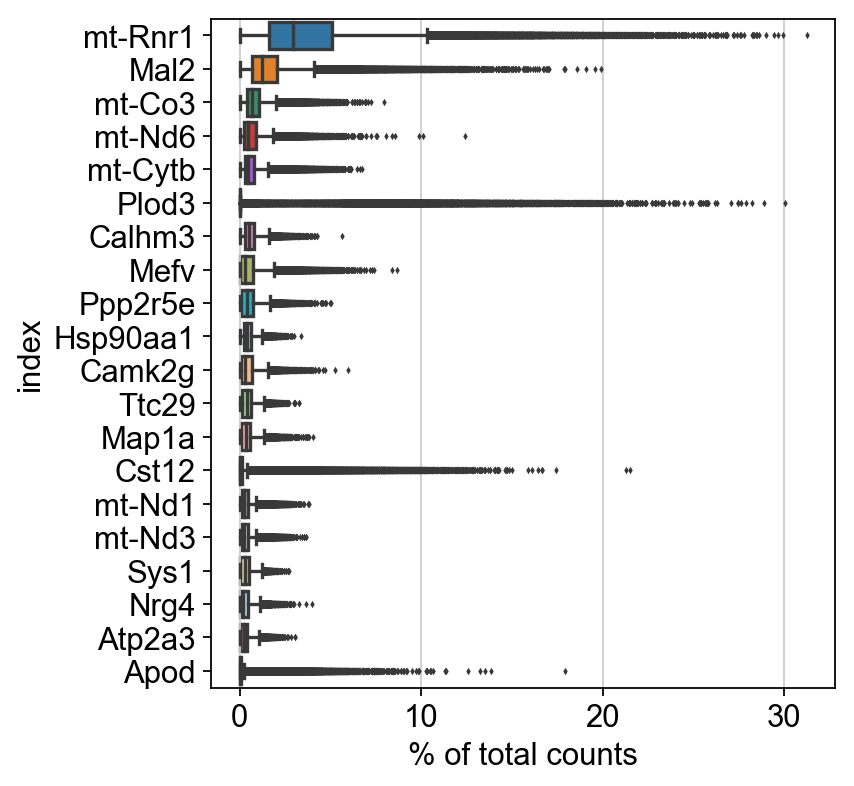

In [61]:
# check the top highly expressed genes
sc.pl.highest_expr_genes(adata, n_top=20)

# Quality controls and filtering

In [62]:
sc.pp.filter_cells(adata, min_genes=1)
sc.pp.filter_genes(adata, min_cells=1)
mito_genes = [name for name in adata.var_names if name.startswith('mt-')]
# for each cell compute fraction of counts in mito genes vs. all genes
adata.obs['percent_mito'] = np.sum(
    adata[:, mito_genes].X, axis=1) / np.sum(adata.X, axis=1)

# add the total counts per cell as observations-annotation to adata
adata.obs['n_counts'] = adata.X.sum(axis=1)

filtered out 1 genes that are detectedin less than 1 cells


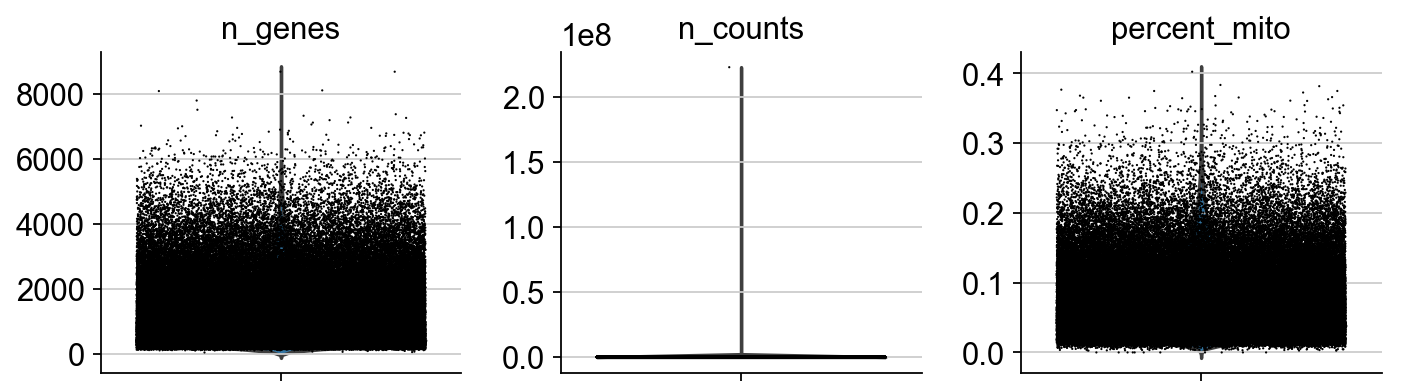

In [63]:
sc.pl.violin(adata, ['n_genes', 'n_counts', 'percent_mito'],
             jitter=0.4, multi_panel=True, save='quality_control_raw_saunders.png')

So, there is initally 194027 cells and 29463 different transcripts. I will filter genes that are not cover in more than 30 cells. And I filter out cells that have less than 200 genes covered. It is the first step of clustering

In [64]:
sc.pp.filter_cells(adata, max_counts=60000)
adata

filtered out 3 cells that havemore than 60000 counts


AnnData object with n_obs × n_vars = 194024 × 29462 
    obs: 'cell_name', '"cluster"', '"subcluster"', '"reason"\n', 'tissue', 'class', 'class_marker', 'type_marker', 'full_name', 'common_name', 'subcluster', 'tissue_subcluster', 'n_genes', 'percent_mito', 'n_counts'
    var: 'n_cells'

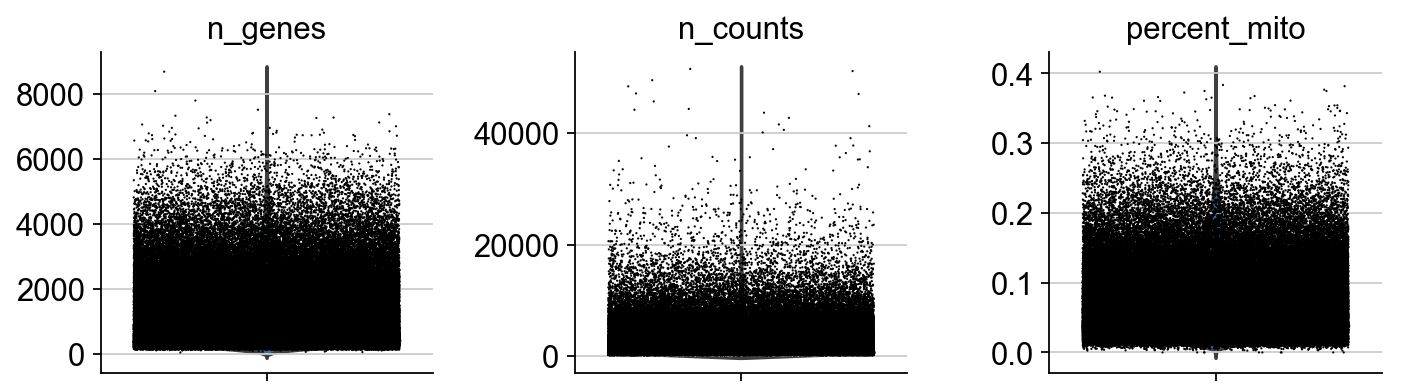

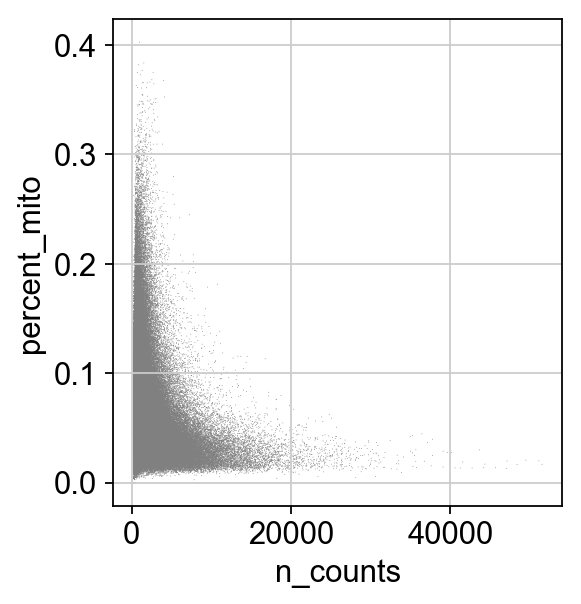

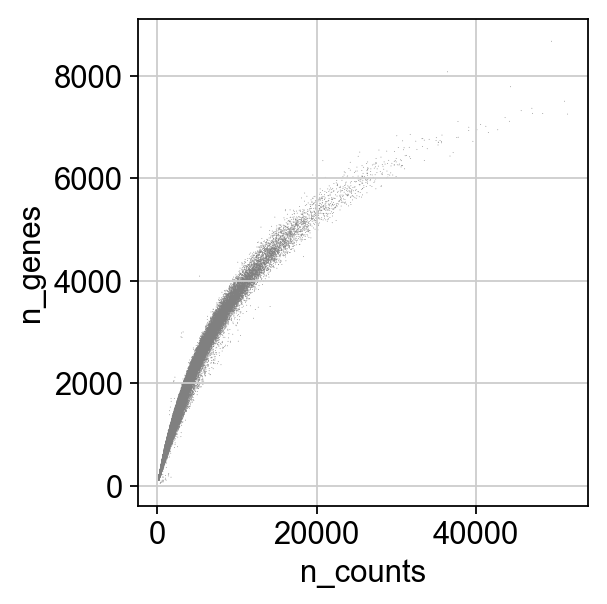

In [65]:
sc.pl.violin(adata, ['n_genes', 'n_counts', 'percent_mito'],
             jitter=0.4, multi_panel=True, save='quality_control_raw_saunders.png')
sc.pl.scatter(adata, x='n_counts', y='percent_mito')
sc.pl.scatter(adata, x='n_counts', y='n_genes')

### additional filtering

In [66]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=30)

filtered out 2967 cells that haveless than 200 genes expressed
filtered out 9438 genes that are detectedin less than 30 cells


In [67]:
adata

AnnData object with n_obs × n_vars = 191057 × 20024 
    obs: 'cell_name', '"cluster"', '"subcluster"', '"reason"\n', 'tissue', 'class', 'class_marker', 'type_marker', 'full_name', 'common_name', 'subcluster', 'tissue_subcluster', 'n_genes', 'percent_mito', 'n_counts'
    var: 'n_cells'

After this basic filtering, I get 191060 cells and 20025.
We filtered 2967 cells and 9438 genes.

In [68]:
mito_genes = [name for name in adata.var_names if name.startswith('mt-')]
# for each cell compute fraction of counts in mito genes vs. all genes
adata.obs['percent_mito'] = np.sum(
    adata[:, mito_genes].X, axis=1) / np.sum(adata.X, axis=1)

# add the total counts per cell as observations-annotation to adata
adata.obs['n_counts'] = adata.X.sum(axis=1)

In [69]:
adata

AnnData object with n_obs × n_vars = 191057 × 20024 
    obs: 'cell_name', '"cluster"', '"subcluster"', '"reason"\n', 'tissue', 'class', 'class_marker', 'type_marker', 'full_name', 'common_name', 'subcluster', 'tissue_subcluster', 'n_genes', 'percent_mito', 'n_counts'
    var: 'n_cells'

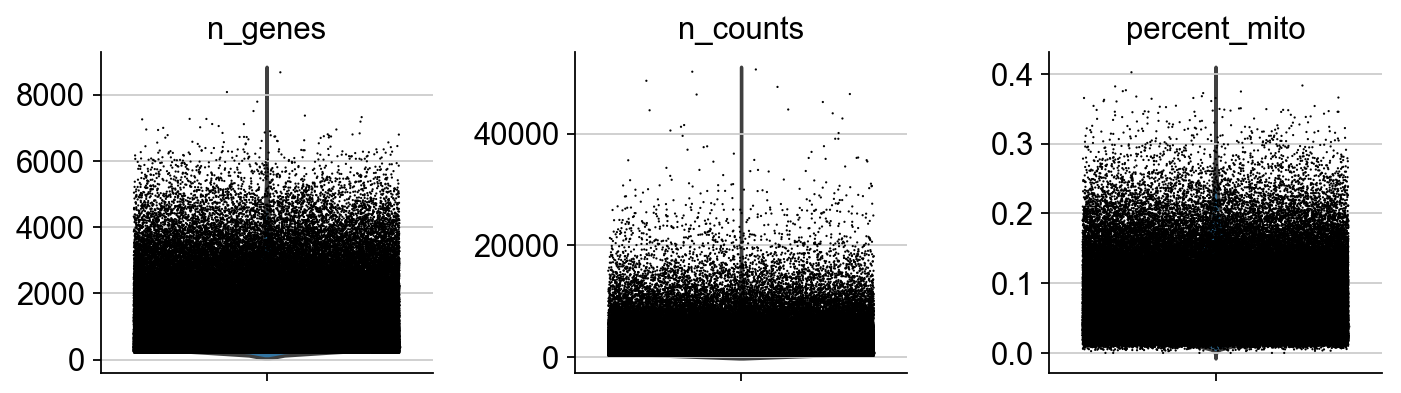

In [70]:
sc.pl.violin(adata, ['n_genes', 'n_counts', 'percent_mito'],
             jitter=0.4, multi_panel=True)

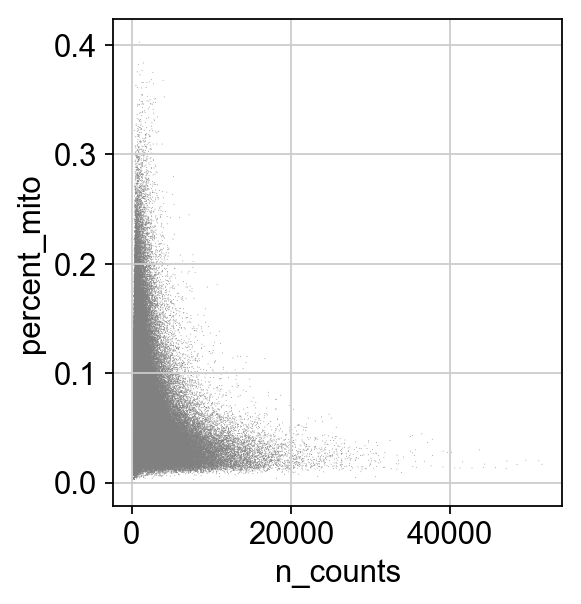

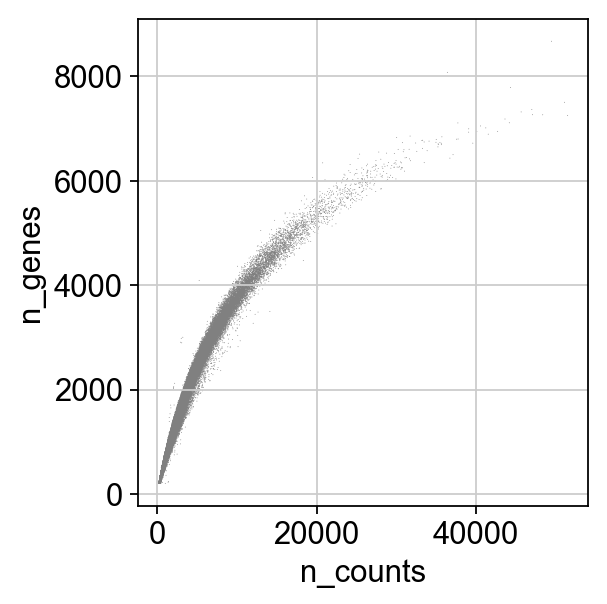

In [71]:
sc.pl.scatter(adata, x='n_counts', y='percent_mito')
sc.pl.scatter(adata, x='n_counts', y='n_genes')

In [72]:
# filter out cells with a high number of mito genes
adata = adata[adata.obs['percent_mito'] < 0.3,:].copy()
## filter cells that are not covered by at least 800 reads.
adata = adata[adata.obs['n_counts'] > 800,:].copy()
## filter cells that are not covered by at no more than 40000 reads.
adata = adata[adata.obs['n_counts'] < 40000,:].copy()

In [73]:
adata

AnnData object with n_obs × n_vars = 129058 × 20024 
    obs: 'cell_name', '"cluster"', '"subcluster"', '"reason"\n', 'tissue', 'class', 'class_marker', 'type_marker', 'full_name', 'common_name', 'subcluster', 'tissue_subcluster', 'n_genes', 'percent_mito', 'n_counts'
    var: 'n_cells'

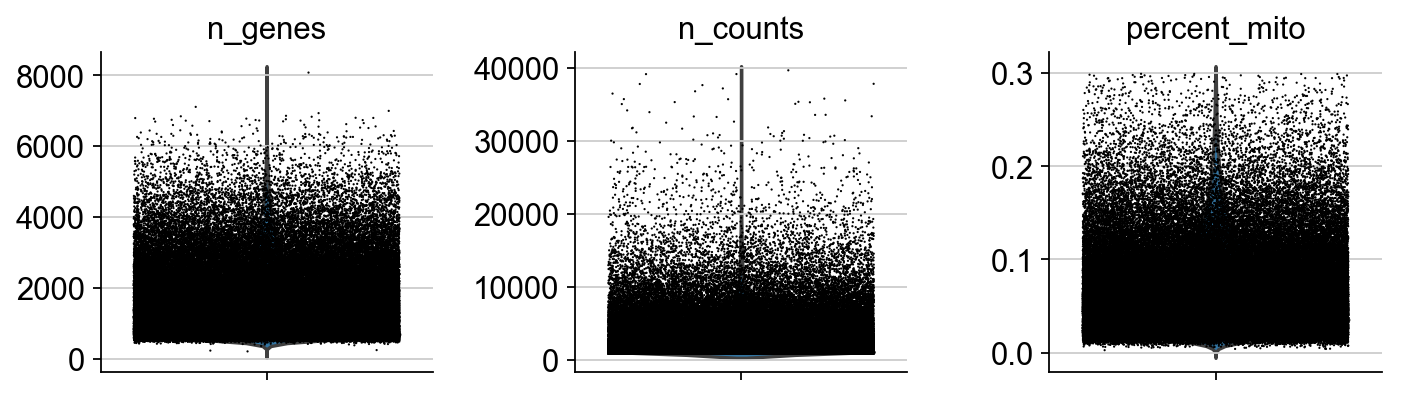

In [74]:
sc.pl.violin(adata, ['n_genes', 'n_counts', 'percent_mito'],
             jitter=0.4, multi_panel=True)

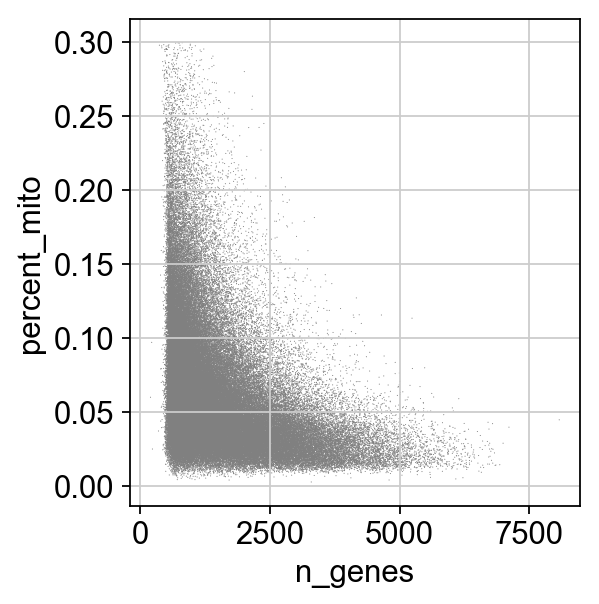

In [75]:
sc.pl.scatter(adata, x='n_genes', y='percent_mito')

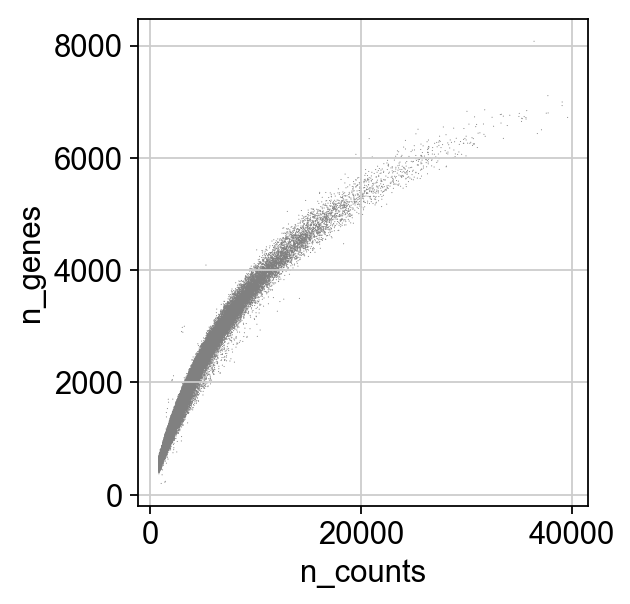

In [76]:
sc.pl.scatter(adata, x='n_counts', y='n_genes')

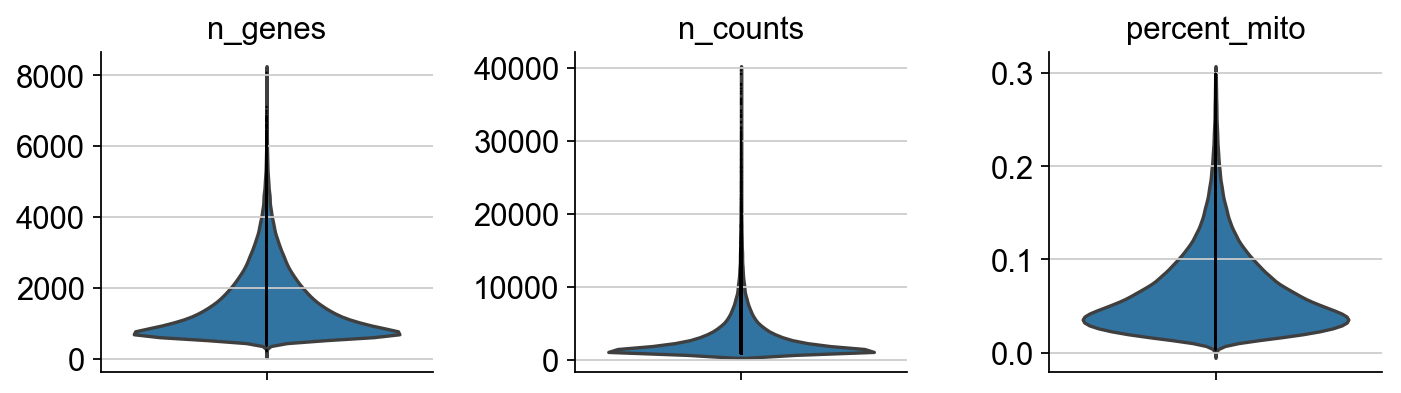

In [77]:
sc.pl.violin(adata, ['n_genes', 'n_counts', 'percent_mito'],
             jitter=0, multi_panel=True)

In [78]:
adata

AnnData object with n_obs × n_vars = 129058 × 20024 
    obs: 'cell_name', '"cluster"', '"subcluster"', '"reason"\n', 'tissue', 'class', 'class_marker', 'type_marker', 'full_name', 'common_name', 'subcluster', 'tissue_subcluster', 'n_genes', 'percent_mito', 'n_counts'
    var: 'n_cells'

In [79]:
# save the current version of adata
adata.write('tmp_file_processing.h5ad')

In [3]:
adata = ad.read('tmp_file_processing.h5ad')

In [5]:
adata

AnnData object with n_obs × n_vars = 129058 × 20024 
    obs: 'cell_name', '"cluster"', '"subcluster"', '"reason"\n', 'tissue', 'class', 'class_marker', 'type_marker', 'full_name', 'common_name', 'subcluster', 'tissue_subcluster', 'n_genes', 'percent_mito', 'n_counts'
    var: 'n_cells'

In [6]:
adata = adata[adata.obs['n_counts'] < 20000, :]

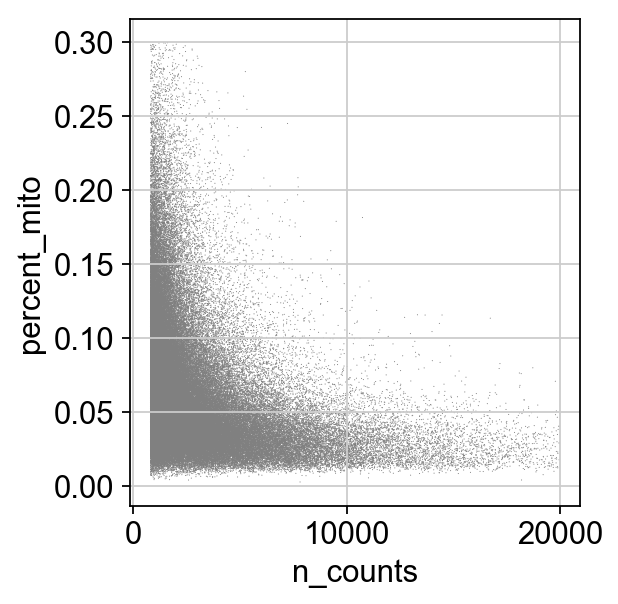

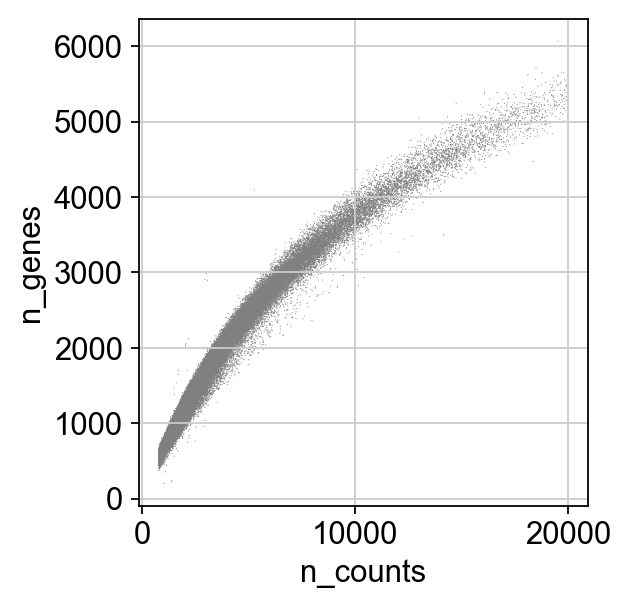

In [7]:
sc.pl.scatter(adata, x='n_counts', y='percent_mito')
sc.pl.scatter(adata, x='n_counts', y='n_genes')

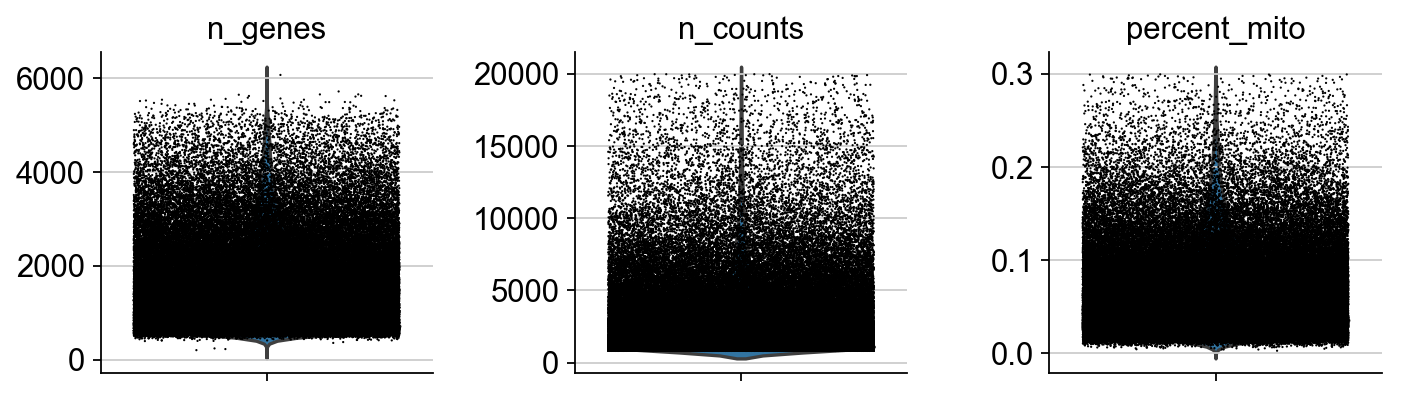

In [8]:
sc.pl.violin(adata, ['n_genes', 'n_counts', 'percent_mito'],
             jitter=0.4, multi_panel=True)

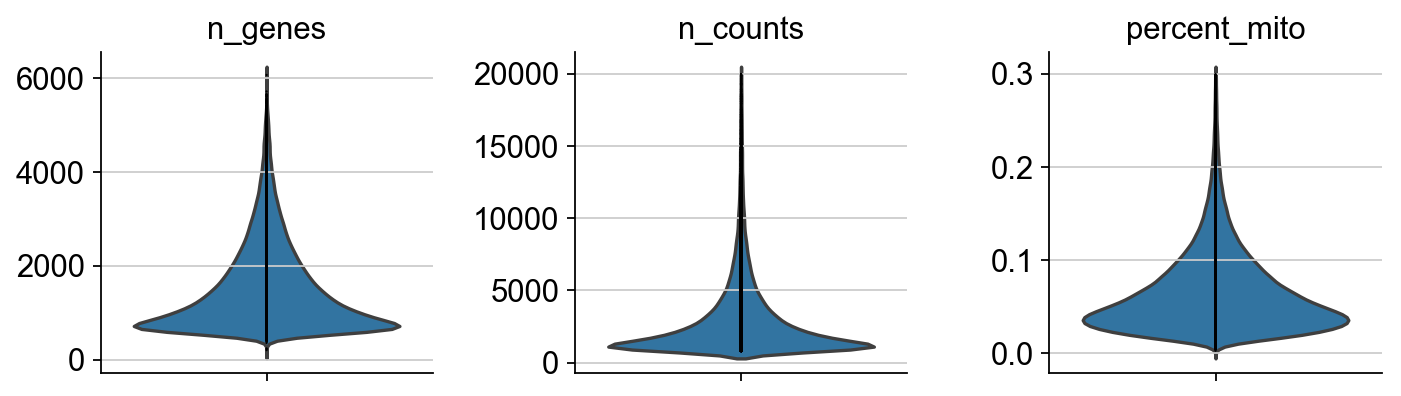

In [9]:
sc.pl.violin(adata, ['n_genes', 'n_counts', 'percent_mito'],
             jitter=0, multi_panel=True)

In [10]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)

normalizing by total count per cell
    finished (0:00:04): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [11]:
filter_result = sc.pp.filter_genes_dispersion(adata.X, min_mean=0.01, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:04)


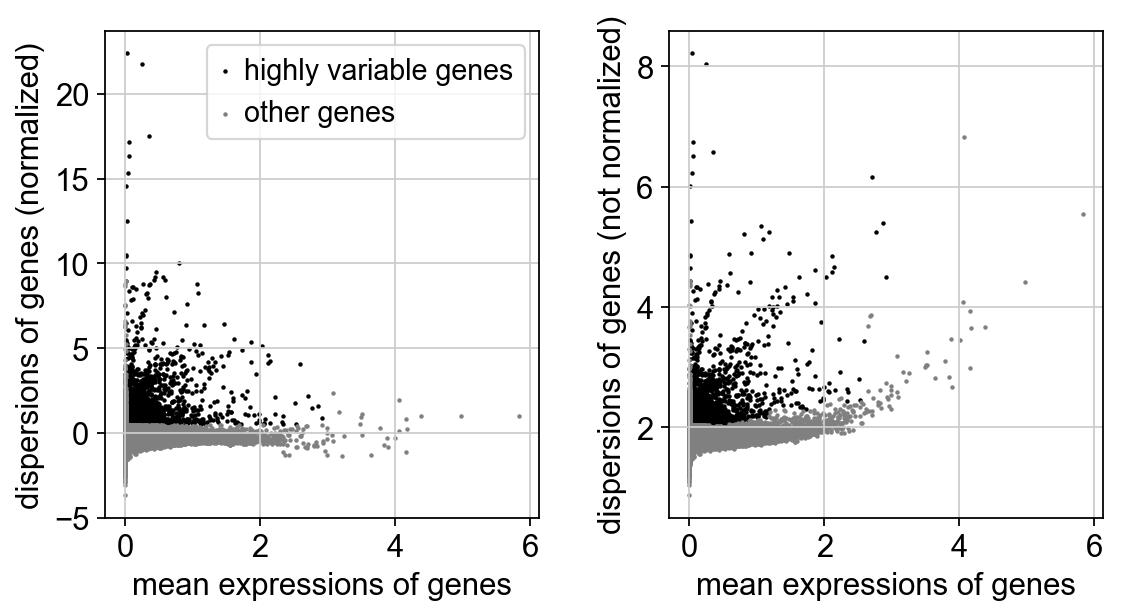

In [12]:
sc.pl.filter_genes_dispersion(filter_result)

In [13]:
adata.raw = adata

In [14]:
adata

AnnData object with n_obs × n_vars = 128588 × 20024 
    obs: 'cell_name', '"cluster"', '"subcluster"', '"reason"\n', 'tissue', 'class', 'class_marker', 'type_marker', 'full_name', 'common_name', 'subcluster', 'tissue_subcluster', 'n_genes', 'percent_mito', 'n_counts'
    var: 'n_cells'

In [15]:
adata2 = adata[:, filter_result.gene_subset]
adata2

View of AnnData object with n_obs × n_vars = 128588 × 2525 
    obs: 'cell_name', '"cluster"', '"subcluster"', '"reason"\n', 'tissue', 'class', 'class_marker', 'type_marker', 'full_name', 'common_name', 'subcluster', 'tissue_subcluster', 'n_genes', 'percent_mito', 'n_counts'
    var: 'n_cells'

In [16]:
sc.pp.log1p(adata)

In [17]:
sc.pp.log1p(adata2)

/Users/anna.danese/anaconda3/lib/python3.7/site-packages/scanpy/preprocessing/_simple.py:285: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(data)


In [19]:
adata.write(DATADIR+'processed_matrix_GSE116470_F_GRCm38.81.P60Cortex.h5ad')

In [20]:
adata2.write(DATADIR+'processed_matrix_hvg_GSE116470_F_GRCm38.81.P60Cortex.h5ad')

In [ ]:
sc.pp.regress_out(adata, ['n_counts', 'percent_mito'])

# VISUALISATION

In [ ]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.tsne(adata)
sc.tl.umap(adata)
sc.tl.louvain(adata)

In [ ]:
sc.pl.pca_overview(adata)

In [ ]:
color = ['n_genes', 'percent_mito', 'n_counts']
sc.pl.pca(adata, color=color)
sc.pl.tsne(adata, color=color)
sc.pl.umap(adata, color=color)

In [ ]:
adata.write(results_file)

## Cell types an Louvain clusters

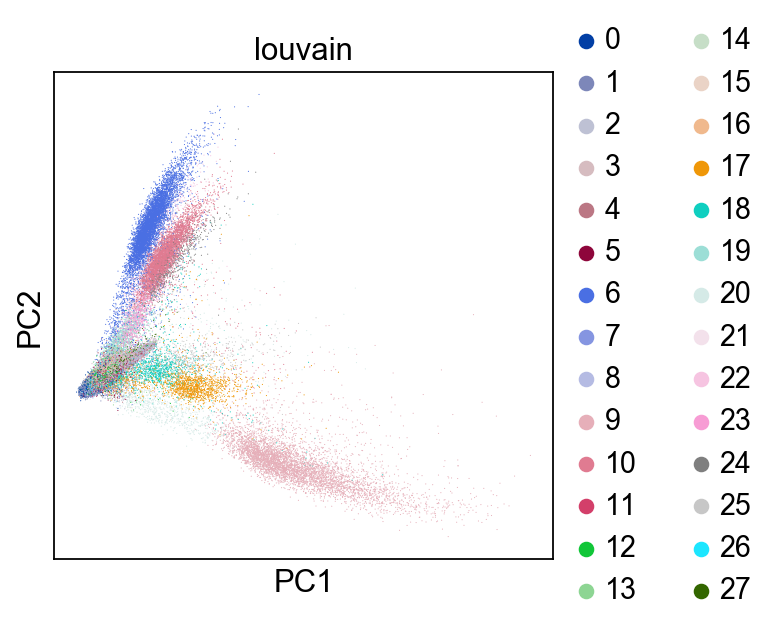

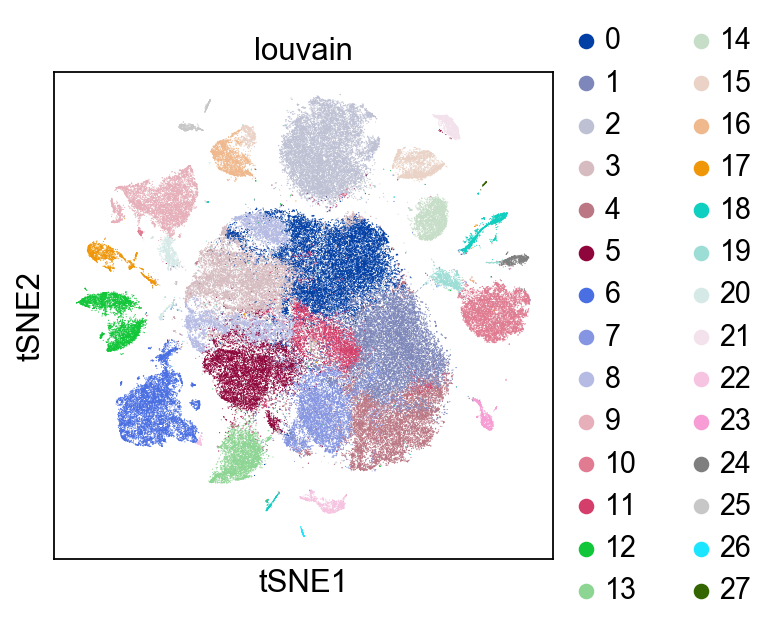

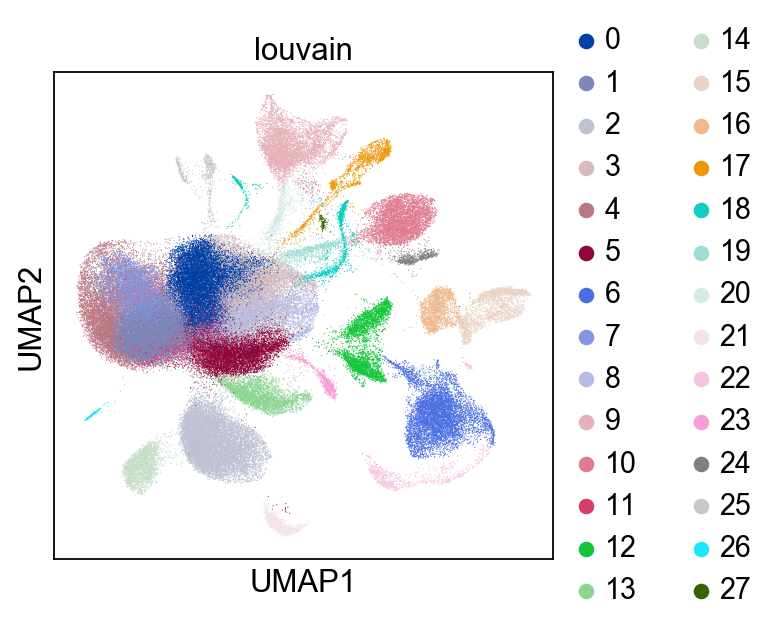

In [46]:
sc.pl.pca(adata, color=['louvain'])
sc.pl.tsne(adata, color=['louvain'])
sc.pl.umap(adata, color=['louvain'])